# Data Visualization

Visualization is a key superpower of a Data Scientist.

- It provides the opportunity to detect hidden patterns from a set of raw and obscure data.
- Assists in providing clear actionable insights to act upon. 
- Helps to make sure that insights are clear and intuitive for the audience/users.
</br></br>

<img src="./images/economist.png" width="800">


### Visualization Landscape

<img src="./images/landscape.png" width="800">


### Matplotlib and its structure 

Matplotlib offers the ability to make **visualizations through first principles**.

According to its documentation, Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. **Tested many times and can produce almost visual.**

Within matplotlib, exists pyplot, which offers numerous functions and interface for plotting. We are going to import both matplotlib and pyplot and use it ahead for creating figures and plots.

In [1]:
from matplotlib import rcsetup
rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

The following image explains the anatomy of a Matplotlib Figure. Understanding this is a critical step towards learning how matplotlib works and how to create an customize plots.

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

##### <span style='color:blue'>The Figure</span>
The base of a matplotlib plot is the **Figure**. The Figure holds all elements of the plot. Think of it as a canvas on which you can create and place multiple plots. The Figure can hold multiple child elements such as plots, and it also tracks all these child elements within it. To relate it to the image above, the Figure is the container that holds the plot and other elements that we see. In the image above it is refered using `plt.figure` which indicates that it is a Figure object borrowed from pyplot.

##### <span style='color:blue'>Artists</span>
As mentioned, Figure holds multiple elements which are referred to as Artists. Axes (not *Axis*) is one of those Artists that forms a region of a plot which can display 2 or 3 dimensional data in form of a plot. Therefore, there can be multiple Axes (or plot regions) on a Figure. Each Axes also has a title, an x-label, and a y-label. Notice that Axes in the image above is called as `fig.subplots` (`fig` is `plt.figure`)  which means that it is an object within the `plt.figure` class.

##### <span style='color:blue'>Axes Objects</span>
Within Axes objects there are 2 or 3 Axis (different from *Axes*). Axis is also an Artist object which is part of Axes. The Axis sets the scale and limits. It also sets ticks (tiny lines that mark scales on each axis) and tick labels. Notice the y Axis and x Axis in the image above which will be referred to as `ax.xaxis` and `ax.yaxis`, respectively (`ax` is `fig.subplots`), since both are objects of the Axes class. Also notice that the ticks and labels are part of the Axis in the image above.

Every other Artist in the image above, such as the line, markers, grid, legend etc, are part of the Axes class. To simplify it further, think of all of these elements as a heirarchy of objects where a Figure object is the outermost container for a matplotlib graphic. Within this are nested objects such as Axes. Each Axes may further have its own set of objects such as plot lines, titles, axis and grids.

### Object-Oriented Interface

Matplotlib has 2 different styles for plotting. We will cover the Object-oriented interface, also called the Axes interface. The other plotting style is called the pyplot interface. Understanding both interfaces is essential for effectively utilizing Matplotlib’s capabilities.

The Object-oriented is an explicit interface and is the one that we highly recommend you to primarily work on in order to avoid errors and confusion. You have more control over the elements of the plot by directly manipulating the objects.

The object-oriented interface builds visuals in a step-by-step stuctured manner. As described above, it requires us to define the Figure, the set of Axes from that Figure and other Artists object on those Axes and Figure objects. Since we are explicitly defining each Artist object including Figure and Axes, it enables us to customize these objects.

We are going to work on an example of using this technique to create a few visualizations below.

In the the first interface below, we create an instance of the Figure class called `fig` and then we use the `.subplots()` on fig to create Axes within the Figure. The Axes that `fig.subplots()` creates is then assigned to variable `ax`. We then use Axes' `.plot()` method to create the line plot over it. We do this by calling `ax.plot()`. As you can notice below, the plot takes a list of x-axis values and the corresponding y-axis values to create a line plot with the following format: `ax.plot(x, y)` where `x` and `y` are lists of integers.

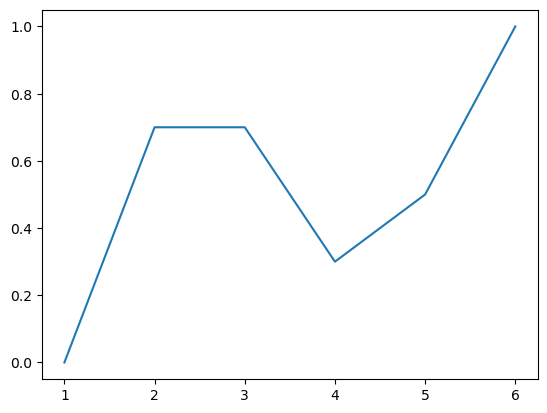

In [3]:
fig = plt.figure()
ax = fig.subplots()
ax.plot([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1]);

We will create another Figure with 2 Axes now, displaying a line plot and scatter plot (with markers). The `subplot()` method takes the number of rows and columns to display on the figure, respectively (In this example it has 1 row with 2 columns). This creates 2 Axes objects within `ax`, where each object can be referred using integer index as shown below i.e. `ax[0]` for 1st and `ax[1]` for the 2nd plot. 

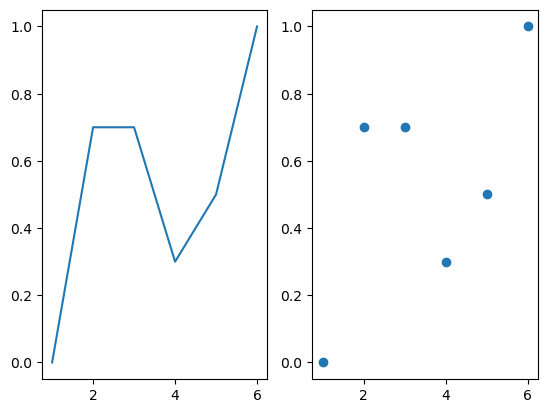

In [4]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax[0].plot([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1])
ax[1].scatter([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1]);

We can add more Artists object to each Axes.

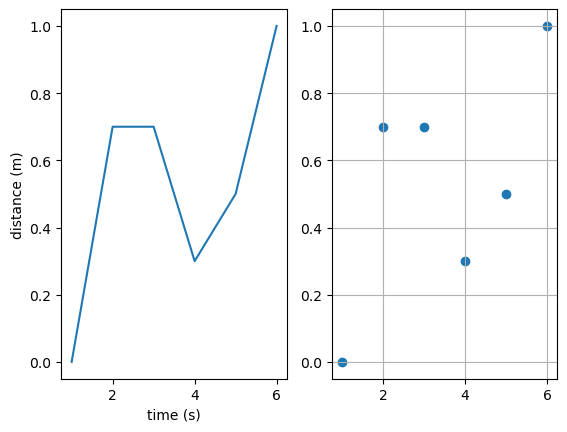

In [5]:
fig = plt.figure()
ax = fig.subplots(1, 2)

ax[0].plot([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1])
ax[0].set_ylabel("distance (m)")
ax[0].set_xlabel("time (s)")

ax[1].scatter([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1])
ax[1].xaxis.grid()
ax[1].yaxis.grid()

### Pyplot Interface

The Pyplot interface is a state-based interface similar to MATLAB. It provides a convenient way to create plots interactively, making it easy to generate and tweak simple plots quickly. Pyplot keeps track of the current figure and axes, and most of its functions manipulate these objects directly.

This can be convenient, particularly when doing interactive work or simple scripts. However, since it only tracks the state of the last Figure and Axes, it becomes confusing to modify a specific Axes when required. Therefore, it is preferred to use the object-oriented approach. 

The command below creates the same plot that we developed above, but it also creates the Figure and Axes along.

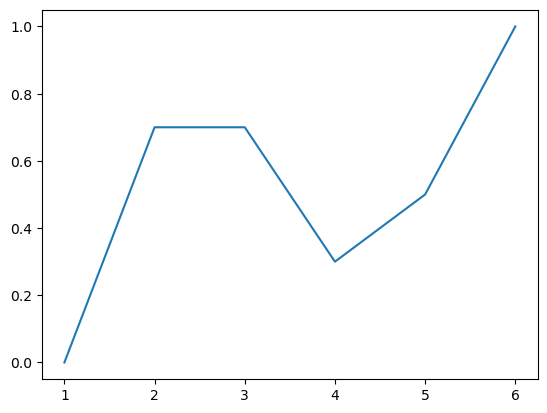

In [6]:
plt.plot([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1]);

We will modify the plot we create by applying methods on the current state.

Text(0, 0.5, 'Distance')

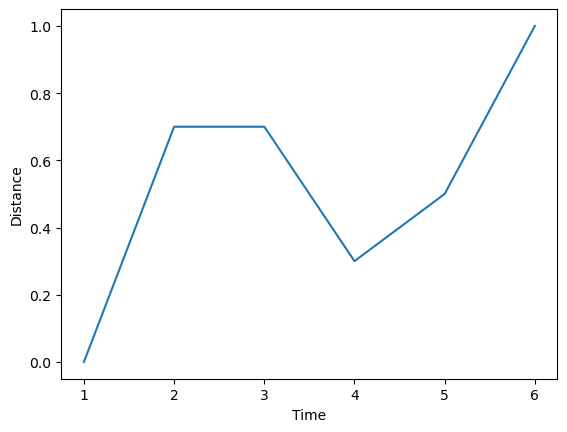

In [7]:
plt.plot([1, 2, 3, 4, 5, 6], [0, 0.7, 0.7, 0.3, 0.5, 1])
plt.xlabel("Time")
plt.ylabel("Distance")

#### <span style='color:blue'>Key Differences</span>

1.	State Management:
    - Pyplot: Manages state automatically, which is convenient for simple plots and interactive use.
    - Object-Oriented: Requires explicit management of figure and axes objects, providing more control and flexibility.
2.	Usage:
	- Pyplot: Suitable for quick, simple plots. Ideal for interactive environments and simple scripts.
    - Object-Oriented: Preferred for more complex plots and applications where fine-grained control is needed.
3.	Flexibility:
    - Pyplot: Less flexible due to automatic state management.
    - Object-Oriented: More flexible and allows for better organization of code, especially in larger applications.

#### <span style='color:blue'>Jupyter Interface</span>


In the Pyplot interface, the state is lost when you move to a new Jupyter cell. This is because Pyplot operates in a state-machine environment where it maintains the current figure and axes states. When you start a new cell, the state is reset, and a new figure is created if you make a new plot.

---

### Data Types and Plots

#### <span style='color:blue'>Categorical Data Visualization</span>

##### a. Categorical vs. Continuous

1. **Bar Plot**:</br>
**Example**: Sales by product category.


In [8]:
# Importing data
data = pd.read_csv('sales_dataset.csv')

In [9]:
data.head()

,Date,Category,Store,Sales
0,2023-01-01,Toys,Target,396
1,2023-01-01,Groceries,Target,147
2,2023-01-01,Clothing,Kroger,61
3,2023-01-02,Groceries,Walmart,108
4,2023-01-02,Groceries,Target,93


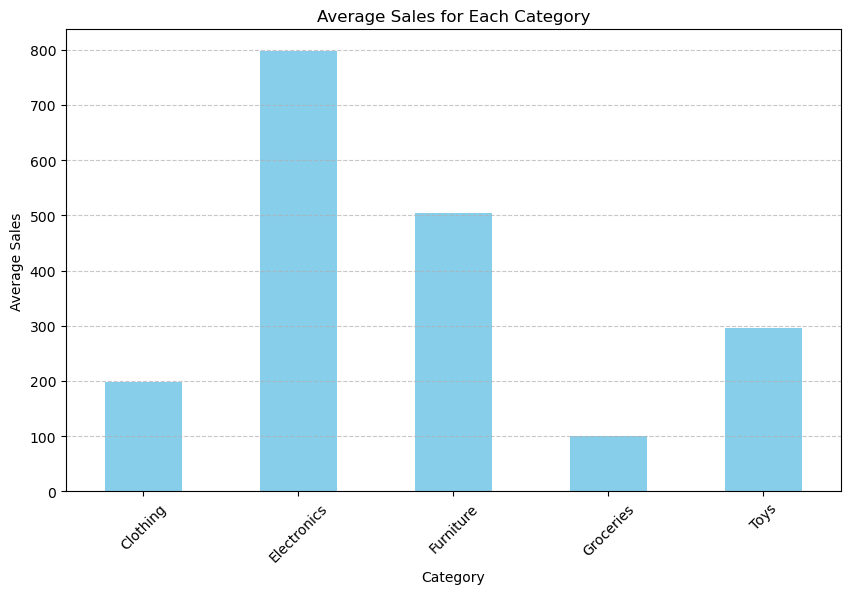

In [10]:
# Calculating average sales for each category
avg_sales_per_category = data.groupby('Category')['Sales'].mean()

# Creating the bar plot using object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

avg_sales_per_category.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Average Sales for Each Category')
ax.set_xlabel('Category')
ax.set_ylabel('Average Sales')
ax.set_xticklabels(avg_sales_per_category.index, rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()




2. **Box Plot**:

The box and whisker plot is another way to visualize the distribution of a continuous variable. It primarily allows us to view the main statistical characteristics (median and quartiles), distribution of data and outliers. 

The end of the tails (called the whiskers) indicate the maximum and minimum value, excluding the outliers. The en 2 ends of the boxplot are the 25th and the 75th percentile of the data. Whereas, the line inside the box indicates the median value.

</br>**Example**: Distribution of sales by Category.


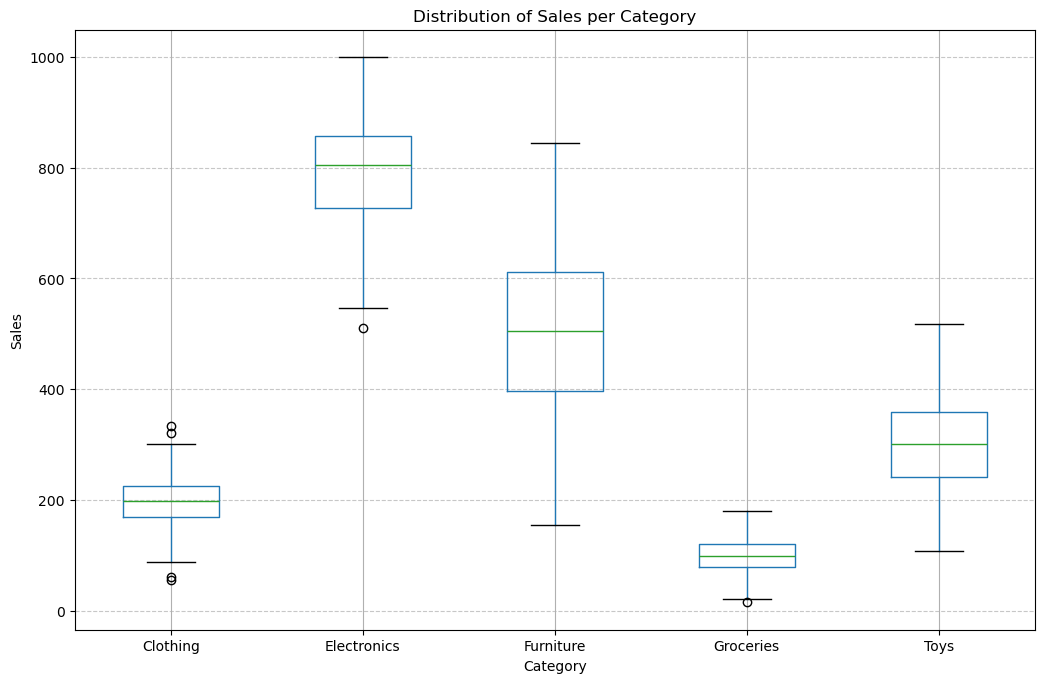

In [11]:
# Creating the box plot using object-oriented approach
fig, ax = plt.subplots(figsize=(12, 8))

data.boxplot(column='Sales', by='Category', ax=ax)
ax.set_title('Distribution of Sales per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
plt.suptitle('')  # Suppress the default title to avoid overlap with ax.set_title
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


3. **Violin Plot**:
It's similar to a box plot but with a rotated kernel density plot on each side, which gives it the shape of a violin. 
   - **Example**: Distribution of passenger age by class (Titanic).

<img src="./images/violinplot.png" width="700">

4. **Strip Plot**:
   - **Example**: Individual data points for scores by class.

<img src="./images/stripplot.png" width="700">

##### b. Categorical vs. Categorical

1. **Mosaic Plot**:
   - **Example**: Relationship between gender and preference for a type of cuisine.

<img src="./images/mosaic.png" width="700">
</br>Image Source: Wikipedia
</br></br>

2. **Stacked Bar Plot**:
   - **Example**: Sales by region and product category.


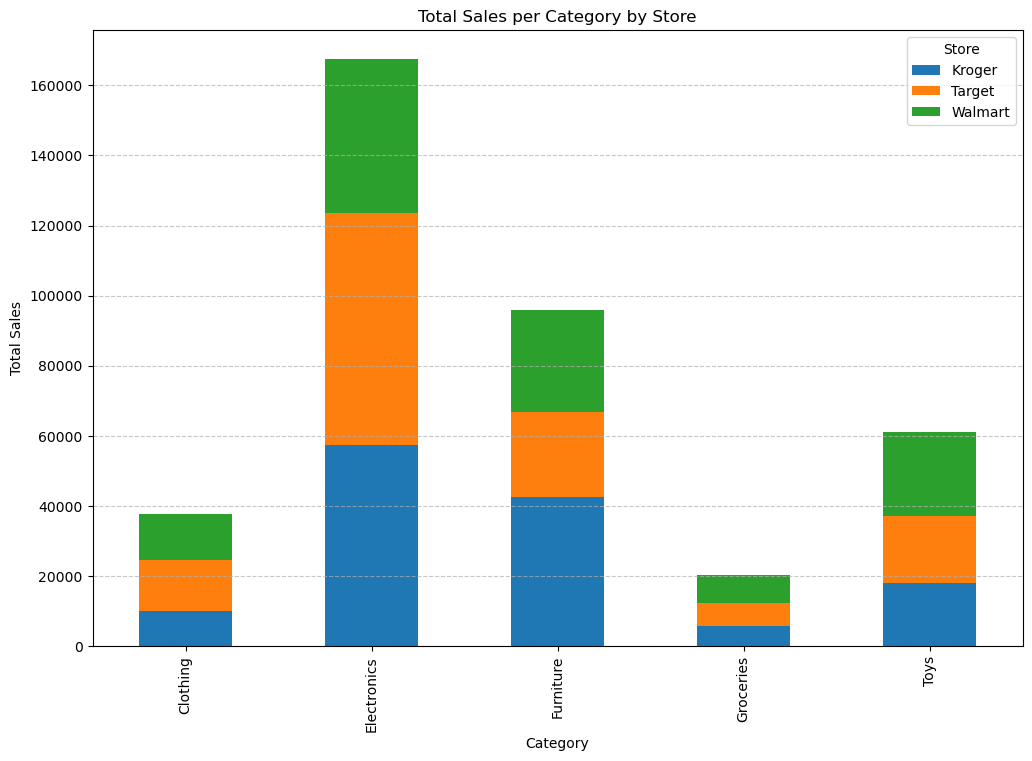

In [12]:
# Creating the stacked bar plot using object-oriented approach
fig, ax = plt.subplots(figsize=(12, 8))

stacked_data = data.pivot_table(index='Category', columns='Store', values='Sales', aggfunc='sum', fill_value=0)

stacked_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Total Sales per Category by Store')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')
ax.legend(title='Store')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


#### <span style='color:blue'>Continuous Data Visualization</span>

##### a. Continuous vs. Continuous

1. **Scatter Plot**:
   - **Example**: Relationship between height and weight.

<img src="./images/scatterplot.png" width="700">

2. **Line Plot**:
   - **Example**: Stock prices over time.

4. **Density Plot**:
   - **Example**: Distribution of a single continuous variable.

   


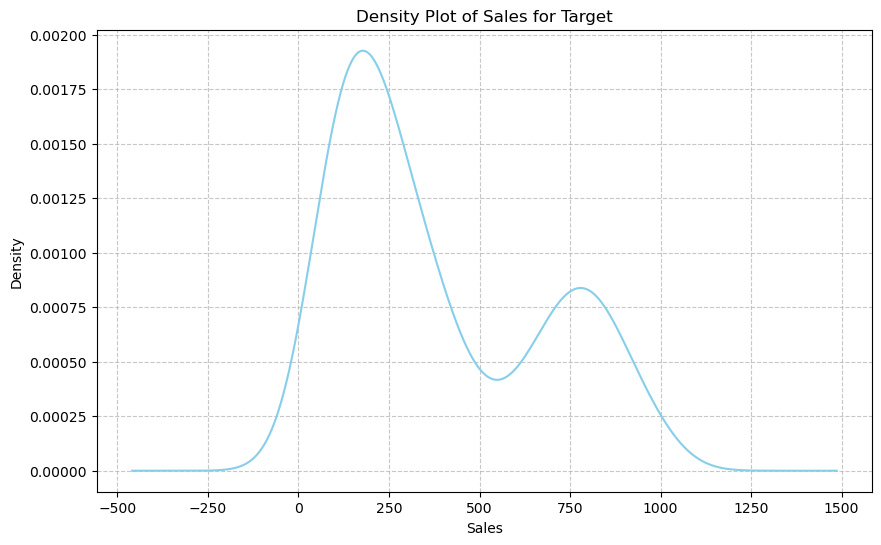

In [13]:
# Creating a density plot for sales from Target using matplotlib directly
fig, ax = plt.subplots(figsize=(10, 6))

target_sales = data[data['Store'] == 'Target']['Sales']

# Plotting the density plot using the .plot.kde() method from pandas
target_sales.plot.kde(ax=ax, color='skyblue', fillstyle='full')
ax.set_title('Density Plot of Sales for Target')
ax.set_xlabel('Sales')
ax.set_ylabel('Density')
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

##### b. Continuous vs. Time

1. **Time Series Plot**:
   - **Example**: Temperature changes over a year.

2. **Area Plot**:
   - **Example**: Cumulative sales over time.


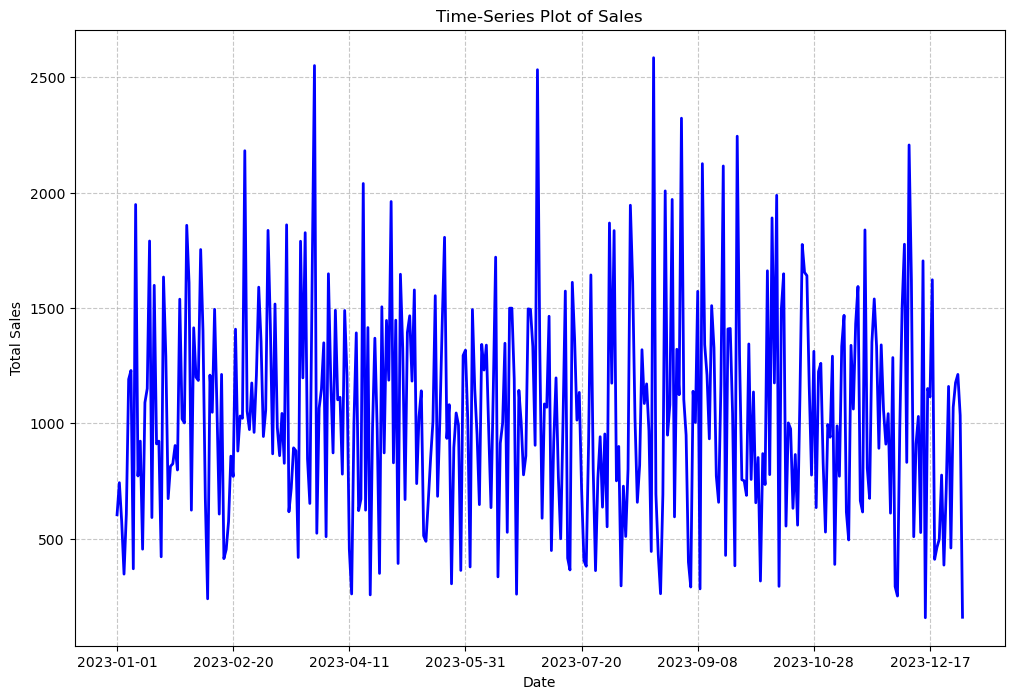

In [14]:
# Creating a time-series plot for the sales dataset

# This line creates a figure and a set of subplots. fig is the Figure object, and ax is the Axes object. 
# The figsize=(12, 8) argument specifies the size of the figure in inches, where the width is 12 inches and the height is 8 inches.
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the time series of sales
data.groupby('Date')['Sales'].sum().plot(ax=ax, color='blue', linewidth=2)
# This calls the plot method on the resulting Series, specifying ax=ax to plot on the previously created Axes object. 
# The color='blue' argument sets the color of the line to blue, and linewidth=2 sets the width of the line to 2.

ax.set_title('Time-Series Plot of Sales')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


##### <span style='color:blue'>Multivariate Data Visualization</span>


1. **Pair Plot**:
   - **Example**: Relationships between multiple variables in the Iris dataset.

2. **Heatmap**:
   - **Example**: Correlation matrix of a dataset.

3. **3D Scatter Plot**:
   - **Example**: Relationship between three continuous variables.


---

### Style Formatting

The structure of matplotlib we discussed above, allows us to create plots and add further styling to the barebones structure. We will see somce common formatting options that are going to be very valueable for our analysis.

#### <span style='color:blue'>Figure Size</span>

To change the size of the figure, we can give a tuple to the `figsize` parameter of the `figure` method. The tuple includes width and height in inches of the entire figure.

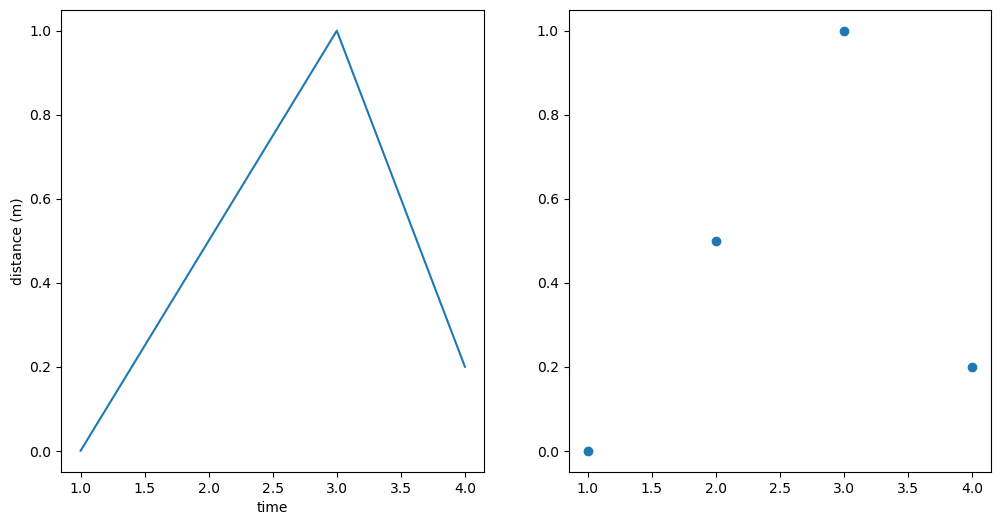

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1, 2)

ax[0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[0].set_ylabel("distance (m)")
ax[0].set_xlabel("time")

ax[1].scatter([1, 2, 3, 4], [0, 0.5, 1, 0.2])

#### <span style='color:blue'>Line Styles</span>

While displaying multiple plots on the same Axes, it can be useful to plot different lines with a distinct line style in order to distinguish. the `linestyle` parameter in the Axes plot function can take a string indicating style of line as an argument. The available styles can and their respective string codes can be found on this [link](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Text(0.5, 0, 'time')

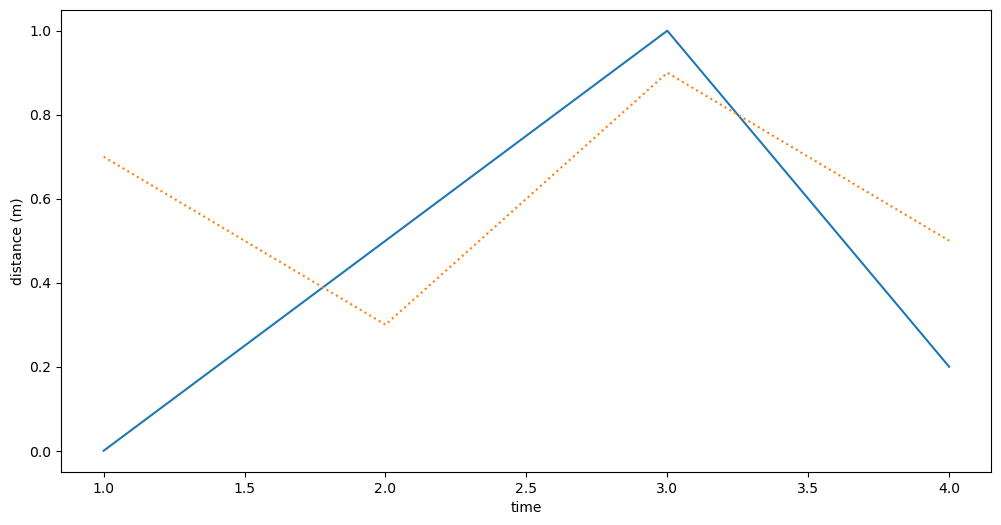

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], linestyle = 'solid')
ax.plot([1, 2, 3, 4], [0.7, 0.3, 0.9, 0.5], linestyle = 'dotted')
ax.set_ylabel("distance (m)")
ax.set_xlabel("time")


#### <span style='color:blue'>Grid</span>

Another interesting element that can make plots easy to interpret is the addition of grids. Each grid line corresponds to the ticks on either x-axis or y-axis. 

The Axes's `.grid()` method will add grid lines to the background. By default, this method adds grid lines for both x and y axis; however, we can provide an `axis` parameter and set it to either x or y axis to only diplay lines that are perpendicular to that axis. See the difference below:

Text(0.5, 0, 'time')

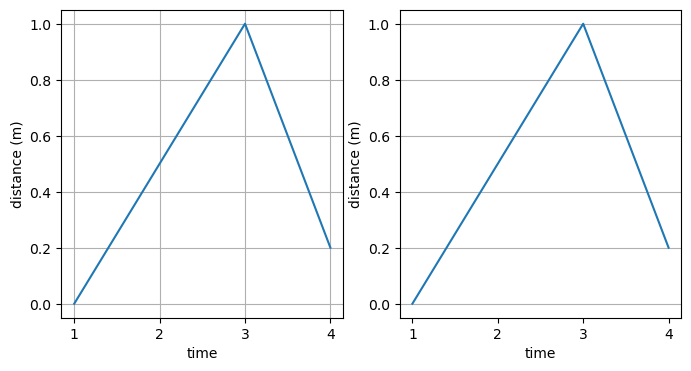

In [17]:
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots(1,2)

ax[0].grid()
ax[0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], linestyle = '-')
ax[0].set_ylabel("distance (m)")
ax[0].set_xlabel("time")

ax[1].grid(axis='y')
ax[1].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], linestyle = '-')
ax[1].set_ylabel("distance (m)")
ax[1].set_xlabel("time")

#### <span style='color:blue'>Syle Sheets</span>

Matplotlib offers a good range of style sheets ([found on this link](https://matplotlib.org/stable/gallery/style_sheets/index.html)) that can be used to set the background of a plot. The style can be set by listing the particular style as part an argument in the method `plt.style.use('default')`. The 'default' is the one that we have been using since the beginning. This can be replace with any other style. However, do note that since this is a method of pyplot object (as it is referencing plt.style) this applies to every figure that comes ahead, unless we set it back to default or any other relevant style.

Text(0.5, 0, 'time')

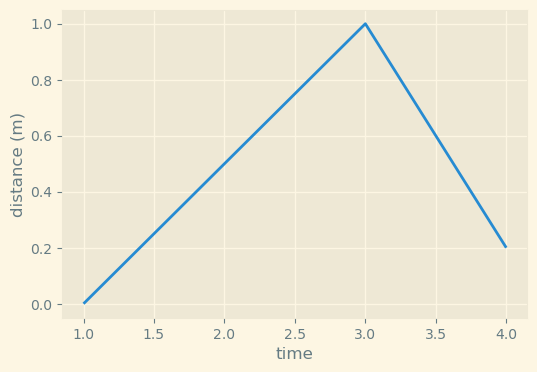

In [18]:
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], linestyle = '-')
ax.set_ylabel("distance (m)")
ax.set_xlabel("time")

#### <span style='color:blue'>Modifying Colors</span>

A major formatting element is the ability to format colors of various elements of the plot. We will just focus on changing the color of the line plots for now for the purpose of demonstration. Maplotlib recognizes various color formats incliding RGB, hex RGB, or just a single character representation for a color. You can effectively learn more about this on the [documentation](https://matplotlib.org/stable/gallery/color/color_demo.html). 

From this documentation, a single letter string, i.e. one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}, are short-hand notations for shades of blue, green, red, cyan, magenta, yellow, black, and white. We use this representation in the plot below by specifying the string in the color argument of the plot method.

Text(0.5, 0, 'time')

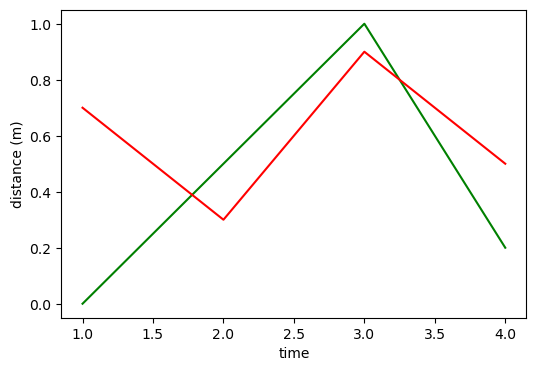

In [19]:
plt.style.use('default')
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], color = 'g')
ax.plot([1, 2, 3, 4], [0.7, 0.3, 0.9, 0.5], color = 'r')
ax.set_ylabel("distance (m)")
ax.set_xlabel("time")

#### <span style='color:blue'>Legend</span>

Lastly, another significant component, one that we already introduced above, is the legend. The legend maps the lines or markers on a plot. The `.legend()` method can automatically detect if the elements in the Axes to be shown in the legend. For this we need to define labels for each plot as shown below. Therefore, we do not need to pass any extra arguments.

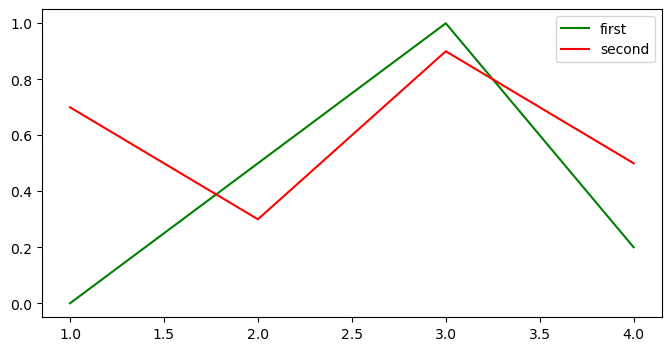

In [20]:
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2], color = 'g', label = 'first')
ax.plot([1, 2, 3, 4], [0.7, 0.3, 0.9, 0.5], color = 'r', label = 'second')
ax.legend()

### Axis Formatting

Formatting both the axis and its label is essential to familiarize the audience with the what the plot refers to. To set both x and y labels, we use Axes' `.set_xlabel()` and `.set_ylabel`, respectively. We have to procide the string to show as label as an arguments to these methods. This is showi n the code below.

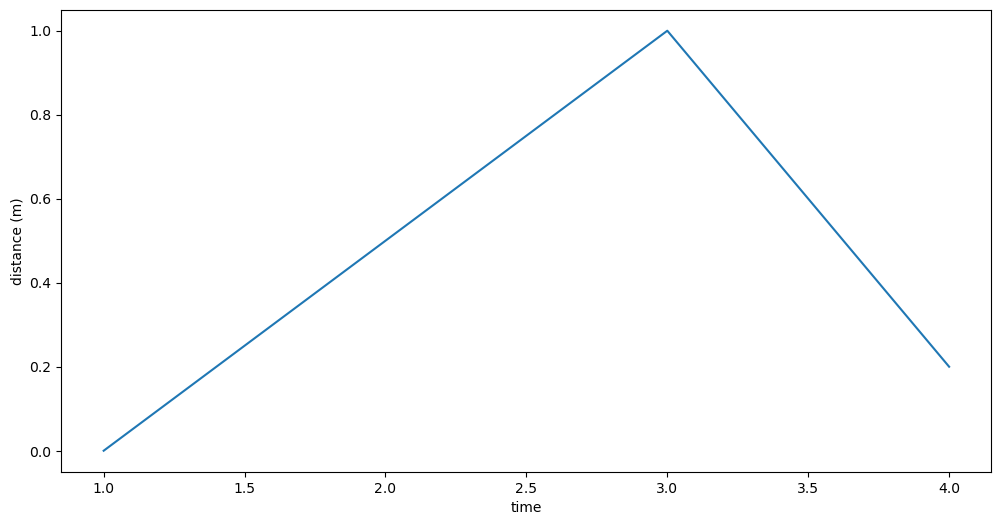

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax.set_ylabel("distance (m)")
ax.set_xlabel("time");

While creating multiple plots, we can also assign the same x and y axis labels to the entire figure if required. This is done by using the figure's `supxlabel()` and `supylabel()` and providing the label as an argument.

Text(0.02, 0.5, 'common x label')

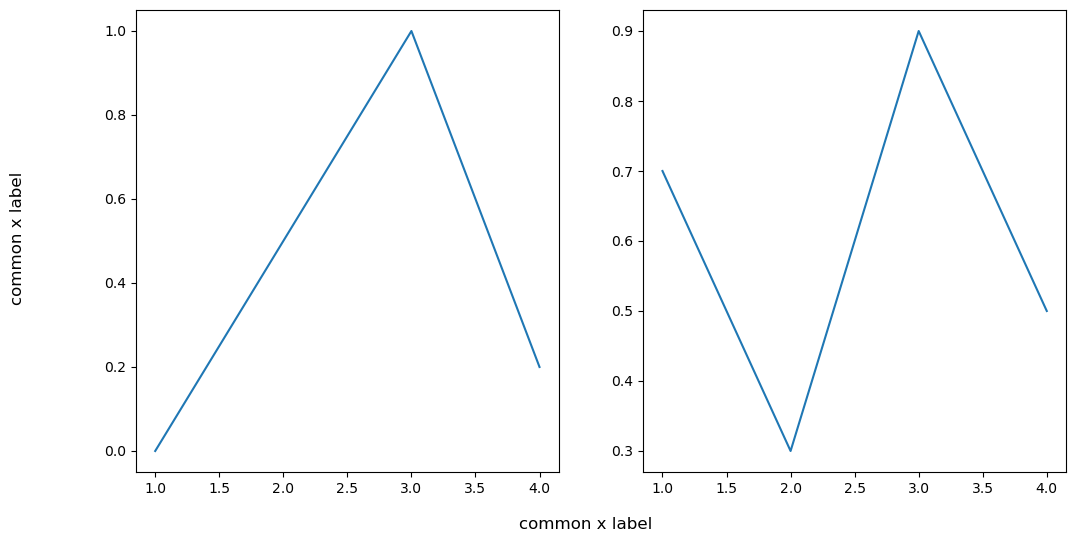

In [22]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1, 2)

ax[0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[1].plot([1, 2, 3, 4], [0.7, 0.3, 0.9, 0.5])

fig.supxlabel('common x label')
fig.supylabel('common x label')

### Multiple plots

In some figures above, we created multiple plots on the same figure. This need frequently arises when displaying similar plots together with different data. The figure's subplot method adds a grid of plots on the figure. The default argument returns a single Axes tht we mostly created above. In order to create multiple axes on the same figure, we need to provide the number of rows and columns to the `.subplots()` method in the format:

`fig.subplots(number of rows, number of columns)`

When we specify subplots of (2,2) as shown below, we create a grid of 2x2 axes. The Axes object (that we referred to as `ax` becomes a 2x2 array) To access each Axes on the grid, we use index the `ax` array by specifying the row and column number in square brackets as shown below:

`ax[1][0]` gets the Axes in 2nd row and 1st column (Note index in arrays start from 0).

The example below demonstrates this:

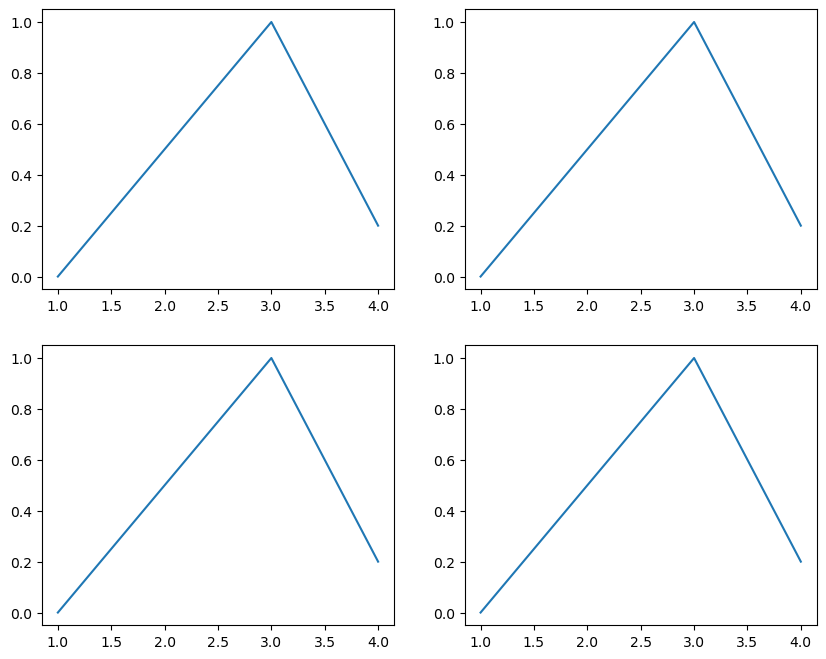

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots(2, 2)

ax[0][0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[0][1].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[1][0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[1][1].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

Below we create 3 Axes in a figure that where each Axes is placed on a single row. We also make a small tweak here. We can enable all the Axes to share a single x-axis. This is done by setting the `sharex` parameter in the `subplot()` function to `True`.

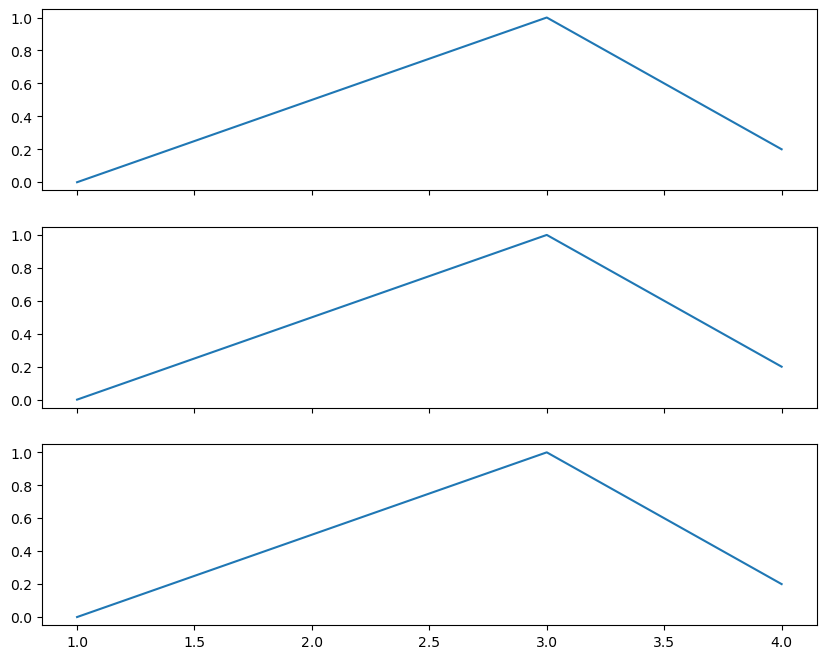

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots(3, 1, sharex=True)

ax[0].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[1].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])
ax[2].plot([1, 2, 3, 4], [0, 0.5, 1, 0.2]);

We might find requirements to display Axes in a non-uniform format as shown below. To acheive this, we use a different way of creating subplot objects. We create multiple Axes and for each Axes we call the pyplot's subplot object and enter the integers in a specified format. The three integers are in the following format: (nrows, ncols, index). Therefore, the first Axes `ax1` is created in the second row of the figure, with one column (as it takes the entire row).

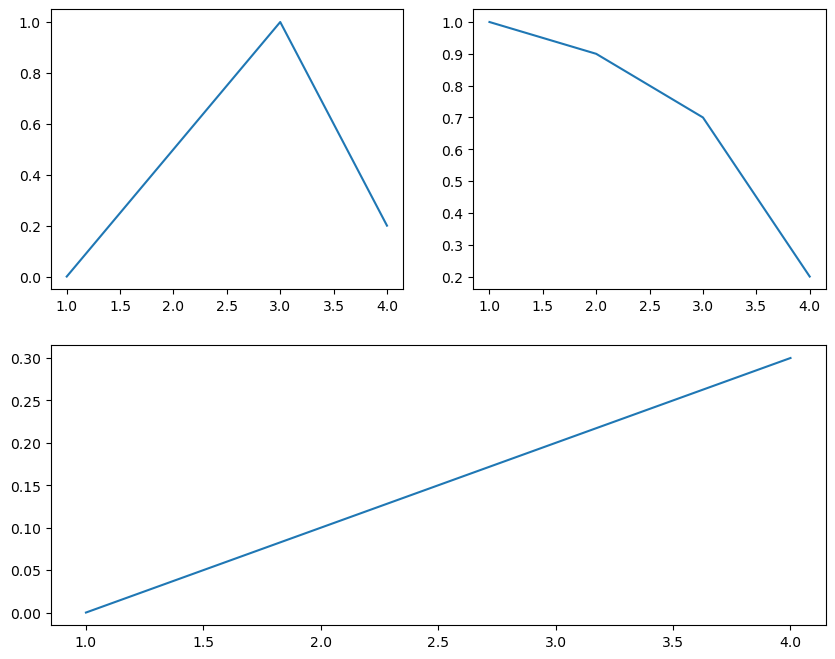

In [25]:
fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(212)
ax1.plot([1, 2, 3, 4], [0, 0.1, 0.2, 0.3])

ax2 = plt.subplot(222)
ax2.plot([1, 2, 3, 4], [1, 0.9, 0.7, 0.2])

ax3 = plt.subplot(221)
ax3.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

### Seaborn

Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn works by providing a range of functions to create a variety of plot types, as well as powerful tools for visualizing and exploring data.

Key Features:
- Comes with several built-in themes.
- Functions to easily create a variety of statistical plots.
- Works seamlessly with Pandas DataFrames
- It can create complex visualizations which help in visualizing relationships between multiple variables.

</br></br></br>

<img src="./images/seaborn.png" width="1000">

In [26]:
import seaborn as sns
sns.set_theme(style="dark")

# Load the example tips dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

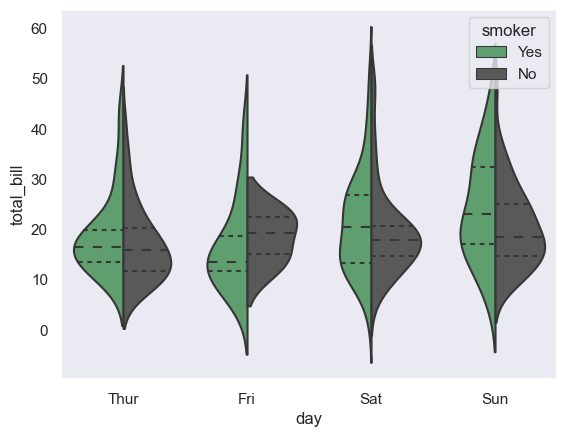

In [27]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", fill=False,
               palette={"Yes": "g", "No": ".35"})

In [28]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


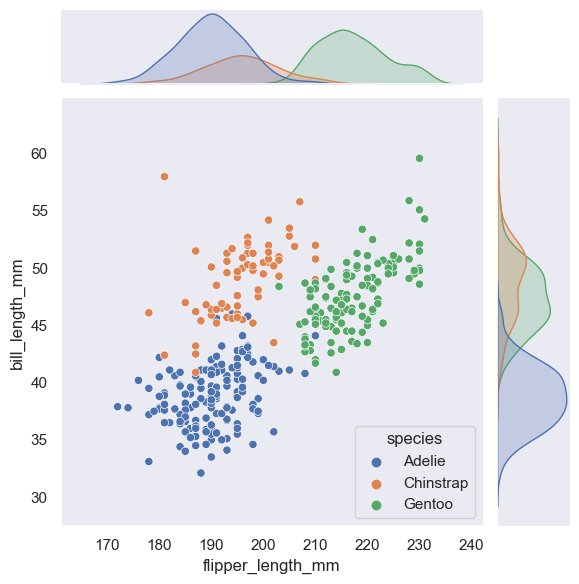

In [29]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

### Geospatial Visulazation with Folium

Tutorial from: https://datasciencedojo.com/blog/geospatial-visualization-folium-python/ </br>
Written by: Rahim Rasool

In [30]:
#!pip install folium

In [31]:
import pandas as pd
import numpy as np
import folium

In [32]:
seattle_map = folium.Map(
    location = [47.6062, -122.3321],
    tiles = 'OpenStreetMap',
    zoom_start = 11
    )
seattle_map

In [33]:
seattle_map2 = folium.Map(
    location=[47.6062, -122.3321],
    tiles = 'Cartodb Positron',
    zoom_start = 10)

#inserting marker
folium.Marker(
    [47.6740, -122.1215],
    popup = 'Redmond'
    ).add_to(seattle_map2)
seattle_map2

In [34]:
#path = "https://data.seattle.gov/api/views/kzjm-xkqj/rows.csv?accessType=DOWNLOAD"
seattle911 = pd.read_csv('seattle911.csv', nrows = 10000)
seattle911.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
0,904 7th Av,Car Fire,05/22/2019 12:55:00 PM,47.606900,-122.329051,POINT (-122.329051 47.6069),F190051945
1,9610 53rd Av S,Aid Response,05/22/2019 12:55:00 PM,47.515984,-122.266529,POINT (-122.266529 47.515984),F190051946
2,106 Pike St,Aid Response,05/22/2019 12:57:00 PM,47.608849,-122.339945,POINT (-122.339945 47.608849),F190051950
3,1902 2nd Av,Aid Response,07/01/2019 07:45:00 AM,47.610972,-122.340465,POINT (-122.340465 47.610972),F190068848
4,4737 Roosevelt Way Ne,Unk Odor,07/01/2019 07:45:00 AM,47.663338,-122.317421,POINT (-122.317421 47.663338),F190068849


In [35]:
seattle911 = seattle911[seattle911.Type.isin(['Aid Response Yellow', 
                                              'Auto Fire Alarm', 
                                              'MVI - Motor Vehicle Incident'])]

#drop rows with missing latitude/longitude values
seattle911.dropna(subset = ['Longitude', 'Latitude'], inplace = True)

In [36]:
for i in range(len(seattle911)):

    folium.CircleMarker(
        location = [seattle911.Latitude.iloc[i], seattle911.Longitude.iloc[i]],
        radius = 3,
        popup = seattle911.Address.iloc[i],
        color = '#3186cc' if seattle911.Type.iloc[i] == 'Aid Response Yellow' else '#6ccc31' 
        if seattle911.Type.iloc[i] =='Auto Fire Alarm' else '#ac31cc',).add_to(seattle_map) 
seattle_map

#### <span style='color:blue'>Choropleth maps</span>

In [37]:
usa_map = folium.Map(
    location=[37.0902, -95.7129],
    tiles = 'Cartodb Positron',
    zoom_start = 4)
usa_map

In [38]:
obesity_link = 'http://data-lakecountyil.opendata.arcgis.com/datasets/3e0c1eb04e5c48b3be9040b0589d3ccf_8.csv'
state_boundaries = 'http://data-lakecountyil.opendata.arcgis.com/datasets/3e0c1eb04e5c48b3be9040b0589d3ccf_8.geojson'

In [39]:
folium.GeoJson(state_boundaries).add_to(usa_map)
usa_map

In [40]:
obesity_data = pd.read_csv(obesity_link)
obesity_data.head()

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area
0,1,Texas,32.4,45.047446,65.778624
1,2,California,24.2,40.755927,41.730164
2,3,Kentucky,34.6,20.348345,10.665636
3,4,Georgia,30.7,17.288448,14.682554
4,5,Wisconsin,30.7,22.428845,16.512937


In [41]:
folium. Choropleth( geo_data = state_boundaries,
    name = 'choropleth',
    data = obesity_data,
    columns = ['NAME', 'Obesity'],
    key_on = 'feature.properties.NAME',
    fill_color = 'YlOrRd',
    fill_opacity = 0.9,
    line_opacity = 0.5,
    legend_name = 'Obesity Percentage').add_to(usa_map)
folium.LayerControl().add_to(usa_map)
usa_map

### Plotly

Plotly is a powerful and versatile open-source data visualization library that enables the creation of interactive and publication-quality charts in Python, R, and JavaScript. It offers a wide range of chart types, including line plots, scatter plots, bar charts, 3D plots, and maps, among others. Plotly’s interactivity features, such as zooming, panning, and tooltips, enhance user engagement and data exploration. It is widely used in data science and analytics for its ease of use and ability to produce highly customizable and interactive visualizations suitable for both web-based applications and static reports.

In [42]:
import plotly.express as px

# Calculating average sales for each category
avg_sales_per_category = data.groupby('Category')['Sales'].mean().reset_index()

# Creating the bar plot using Plotly
fig = px.bar(avg_sales_per_category, x='Category', y='Sales',
             title='Average Sales for Each Category',
             labels={'Sales': 'Average Sales', 'Category': 'Category'},
             color='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Display the plot
fig.show()


### <span style='color:purple'>What to learn ahead?</span>

